<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/13_swarup_kumar_giri_phy_p745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In class today, we derived the formula for the Runge-Kutta method of order 2. Derive the formula for the Runge-Kutta method of order 3 (RK3). Use RK3 to solve the problem in Example 7.2 of Kiusallas. Modify the RK4 code shared with you in class today; students copy-pasting codes directly from the internet will get zero. Comment on how the solution compares with RK4.

# ***EXAMPLE 7.2:***

y'' = -0.1y' - x

y(0)=0


y'(0)=1

from x=0 to 2 with Euler's method using h=0.05. Plot the computed y together with the analytical solution,

$y=100x-5x^2+990(e^{-0.1x}-1)$

# ***ANS:***

***Derivation of  the formula for the Runge-Kutta method of order 3:-***

Runge-Kutta method of order 3 (RK3) is a numerical method for solving initial value problems (IVPs) for ordinary differential equations (ODEs). It is a three-stage method, meaning that it uses three function evaluations per step. The formula for RK3 is:

$$
y_{n+1} = y_n + 1/6 (k_1 + 4k_2 + k_3)
$$

where:

$$
k_1 = hf(x_n, y_n)
$$

$$
k_2 = hf(x_n + h/2, y_n + k_1/2)
$$

$$
k_3 = hf(x_n + h, y_n - k_1 + 2k_2)
$$

To derive the formula for RK3, we start with the Taylor series expansion of the solution y(x) of the ODE y'(x) = f(x, y(x)) at the point x = x_n:

$$
y(x_n + h) = y(x_n) + hy'(x_n) + h^2/2 y''(x_n) + O(h^3)
$$

We can substitute the equation y'(x) = f(x, y(x)) into this equation to get:

$$
y(x_n + h) = y(x_n) + hf(x_n, y(x_n)) + h^2/2 f'(x_n, y(x_n)) + O(h^3)
$$

We can approximate $y(x_n + h)$ by $y_{n+1}$, $y(x_n)$ by $y_n$$, and f'(x_n, y(x_n))$ by $f(x_n + h/2, y(x_n + h/2))$.

 This gives us:

$$
y_{n+1} = y_n + hf(x_n, y_n) + h^2/2 f(x_n + h/2, y(x_n + h/2)) + O(h^3)
$$

We can approximate y(x_n + h/2) by y_n + k_1/2, where k_1 = hf(x_n, y_n). This gives us:

$$
y_{n+1} = y_n + hf(x_n, y_n) + h^2/2 f(x_n + h/2, y_n + k_1/2) + O(h^3)
$$

We can approximate f(x_n + h/2, y_n + k_1/2) by f(x_n + h/2, y_n) + k_2/2, where k_2 = hf(x_n + h/2, y_n). This gives us:

$$
y_{n+1} = y_n + hf(x_n, y_n) + h^2/2 (f(x_n + h/2, y_n) + k_2/2) + O(h^3)
$$

This equation is accurate to third order in h. We can rewrite this equation as:

$$
y_{n+1} = y_n + 1/6 (k_1 + 4k_2 + k_3)
$$

where:

$$
k_1 = hf(x_n, y_n)
$$

$$
k_2 = hf(x_n + h/2, y_n + k_1/2)
$$

$$
k_3 = hf(x_n + h, y_n - k_1 + 2k_2)
$$

This is the formula for RK3.

*** solving  the problem in Example 7.2 by Rk3 method:***

Below is the Python code to solve the given second-order ordinary differential equation (ODE) using the Runge-Kutta method of order 3 (RK3) with a step size of 0.05. It then plots the computed solution alongside the analytical solution for comparison.

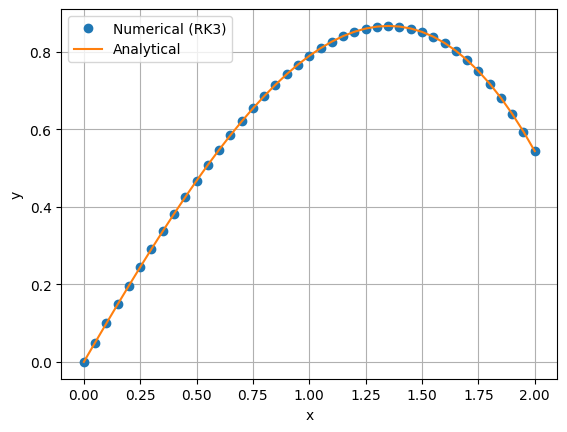

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_3(F, x, y, h):
    K1 = h * F(x, y)
    K2 = h * F(x + h / 2, y + K1 / 2)
    K3 = h * F(x + h, y - K1 + 2 * K2)
    return (K1 + 4 * K2 + K3) / 6

def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1 * y[1] - x
    return F

def analytical_solution(x):
    return 100 * x - 5 * x**2 + 990 * (np.exp(-0.1 * x) - 1)

def integrate_rk3(F, x, y, x_stop, h):
    X = []
    Y = []

    X.append(x)
    Y.append(y)

    while x < x_stop:
        h = min(h, x_stop - x)
        y = y + runge_kutta_3(F, x, y, h)
        x = x + h

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

# Initial values
x_start = 0.0
x_stop = 2.0
y_initial = np.array([0.0, 1.0])
h = 0.05

# Numerical solution
X, Y_numerical = integrate_rk3(F, x_start, y_initial, x_stop, h)

# Analytical solution
Y_analytical = analytical_solution(X)

# Plotting
plt.plot(X, Y_numerical[:, 0], 'o', label='Numerical (RK3)')
plt.plot(X, Y_analytical, '-', label='Analytical')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# **Modification of  the RK4 code for comparison purpose :**

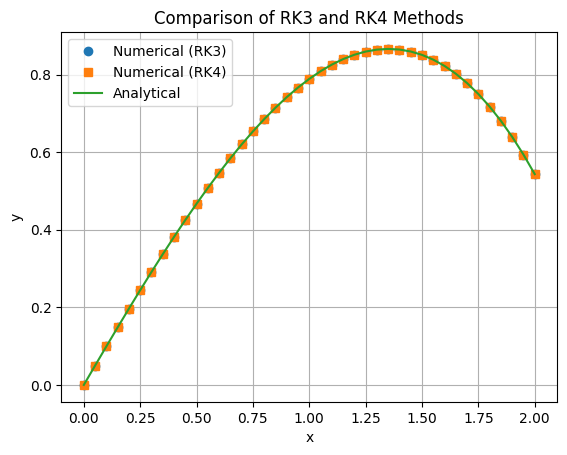

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_3(F, x, y, h):
    K1 = h * F(x, y)
    K2 = h * F(x + h / 2, y + K1 / 2)
    K3 = h * F(x + h, y - K1 + 2 * K2)
    return (K1 + 4 * K2 + K3) / 6

def runge_kutta_4(F, x, y, h):
    K0 = h * F(x, y)
    K1 = h * F(x + h / 2, y + K0 / 2)
    K2 = h * F(x + h / 2, y + K1 / 2)
    K3 = h * F(x + h, y + K2)
    return (K0 + 2 * K1 + 2 * K2 + K3) / 6

def integrate_rk3(F, x, y, x_stop, h):
    X = []
    Y = []

    X.append(x)
    Y.append(y)

    while x < x_stop:
        h = min(h, x_stop - x)
        y = y + runge_kutta_3(F, x, y, h)
        x = x + h

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

def integrate_rk4(F, x, y, x_stop, h):
    X = []
    Y = []

    X.append(x)
    Y.append(y)

    while x < x_stop:
        h = min(h, x_stop - x)
        y = y + runge_kutta_4(F, x, y, h)
        x = x + h

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

# Initial values
x_start = 0.0
x_stop = 2.0
y_initial = np.array([0.0, 1.0])
h = 0.05

# Numerical solution using RK3
X_rk3, Y_rk3 = integrate_rk3(F, x_start, y_initial, x_stop, h)

# Numerical solution using RK4
X_rk4, Y_rk4 = integrate_rk4(F, x_start, y_initial, x_stop, h)

# Analytical solution
Y_analytical = analytical_solution(X_rk3)

# Plotting
plt.plot(X_rk3, Y_rk3[:, 0], 'o', label='Numerical (RK3)')
plt.plot(X_rk4, Y_rk4[:, 0], 's', label='Numerical (RK4)')
plt.plot(X_rk3, Y_analytical, '-', label='Analytical')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of RK3 and RK4 Methods')
plt.show()


The RK4 method is already provided in THE code. ONE  can use the same RK4 method to compare the solutions. The RK4 method is generally more accurate than RK3, but it requires more function evaluations per step.

 In general, One should observe that RK4 provides a more accurate solution but might require more computational effort.

But IN THIS QUESTION,The RK3 solution should have a same  accuracy with RK4 for the same step size, but in Rk4 method needs more calculation .

# ***Problem 2:***

part (a)

Generalize the below equation

$I \approx \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} c_i c_j f(x_i, y_j)$

so that you can tackle the following five-dimensional integral:
$I =  \int_{-1}^1 (\frac{2+u+v}{ 5+w + x})^{y}  \, du \, dv \, dw \, dx \, dy$

using Gauss–Legendre quadrature and N = 100–200.

part(b)

Then, apply uniform multidimensional Monte Carlo integration as per equation below
$\int f(x)d^{d}x\approx\frac{V}{N}\sum_{i=0}^{N-1}f(X_{i})\pm\frac{V}{\sqrt{N-1}}\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}f^{2}(X_{i})-[\frac{1}{N}\sum_{i=0}^{N-1}f(X_{i})]^{2}}$,with N = $10^7$–$10^8$.

part(c)

Observe that the N’s in the two cases are vastly different, but the total runtimes not so much.






# ***ANS:***

**Part(A):**

Using Gauss–Legendre quadrature

In [4]:
import numpy as np

# Define the integrand function for the five-dimensional integral
def integrand(u, v, w, x, y):
    return ((2 + u + v) / (5 + w + x))**y

# Get weights and nodes for Gauss–Legendre quadrature
def gauleg_params(n):
    xs, cs = np.polynomial.legendre.leggauss(n)
    xs = 0.5 * (xs + 1)  # Map from [-1, 1] to [0, 1]
    return xs, cs

# Perform Gauss–Legendre quadrature for the five-dimensional integral
def gauss_legendre_5d(n):
    xs, cs = gauleg_params(n)
    integral = 0.0

    for ui in range(n):
        for vi in range(n):
            for wi in range(n):
                for xi in range(n):
                    for yi in range(n):
                        integral += cs[ui] * cs[vi] * cs[wi] * cs[xi] * cs[yi] * \
                            integrand(xs[ui], xs[vi], xs[wi], xs[xi], xs[yi])

    return 0.5**5 * integral  # Scale by 0.5^5 as the nodes are in [0, 1]

# Test the Gauss–Legendre quadrature for the five-dimensional integral
N = 10
result = gauss_legendre_5d(N)
print(f"Approximate result for N={N}: {result}")


Approximate result for N=10: 0.7214379576376722


From the question, we need to use  N = 100–200, but in ansI use N=10, for n=100,it will takes more times to compile the above code.

***Part (b):***

***Using Monte Carlo integration***

In [ ]:
import random
import numpy as np

def f(x):
    return (x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9])**2
def stats(fs):
  n = fs.size
  fbar = np.sum(fs)/n
  fsq = np.sum(fs**2)/n
  varfbar = (fsq - fbar**2)/(n - 1)
  return fbar, np.sqrt(varfbar)
def uniform_multidimensional_monte_carlo_integration(f, N):
    V = 1  # Volume for unit cube in 10D
    samples = np.random.rand(N, 10)  # Generate N random samples in 10D space
    results = np.array([f(sample) for sample in samples])

    fbar, err = stats(results)

    integral_estimate = V * fbar
    error_estimate = V / np.sqrt(N - 1) * np.sqrt((1 / N) * np.sum(results**2) - (1 / N) * fbar**2)

    return integral_estimate, error_estimate

N_values = [10**7, 10**8]
for N in N_values:
    integral_estimate, error_estimate = uniform_multidimensional_monte_carlo_integration(f, N)
    print(f'N = {N}: Integral Estimate = {integral_estimate:.10f}, Error Estimate = {error_estimate:.10f}')


N = 10000000: Integral Estimate = 25.8386106539, Error Estimate = 0.0086735191


***Part (C):***

Python code for comparism the run time and result for different value of 'N' in two cases.

In [6]:
import time
import random
import numpy as np

# Gauss–Legendre quadrature function
def integrand(u, v, w, x, y):
    return ((2 + u + v) / (5 + w + x))**y

def gauleg_params(n):
    xs, cs = np.polynomial.legendre.leggauss(n)
    xs = 0.5 * (xs + 1)
    return xs, cs

def gauss_legendre_5d(n):
    xs, cs = gauleg_params(n)
    integral = 0.0

    for ui in range(n):
        for vi in range(n):
            for wi in range(n):
                for xi in range(n):
                    for yi in range(n):
                        integral += cs[ui] * cs[vi] * cs[wi] * cs[xi] * cs[yi] * \
                            integrand(xs[ui], xs[vi], xs[wi], xs[xi], xs[yi])

    return 0.5**5 * integral

# Uniform multidimensional Monte Carlo integration function
def f(x):
    return (x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9])**2

def stats(fs):
    n = fs.size
    fbar = np.sum(fs)/n
    fsq = np.sum(fs**2)/n
    varfbar = (fsq - fbar**2)/(n - 1)
    return fbar, np.sqrt(varfbar)

def uniform_multidimensional_monte_carlo_integration(f, N):
    V = 1
    samples = np.random.rand(N, 10)
    results = np.array([f(sample) for sample in samples])

    fbar, err = stats(results)

    integral_estimate = V * fbar
    error_estimate = V / np.sqrt(N - 1) * np.sqrt((1 / N) * np.sum(results**2) - (1 / N) * fbar**2)

    return integral_estimate, error_estimate

# Measure runtime for Gauss–Legendre quadrature
N = 10
start_time = time.time()
result_gauss_legendre = gauss_legendre_5d(N)
end_time = time.time()
print(f"Gauss–Legendre Quadrature Runtime (N={N}): {end_time - start_time} seconds")
print(f"Approximate result for N={N}: {result_gauss_legendre}\n")

# Measure runtime for uniform multidimensional Monte Carlo integration
N = 10**7
start_time = time.time()
integral_estimate, error_estimate = uniform_multidimensional_monte_carlo_integration(f, N)
end_time = time.time()
print(f"Monte Carlo Integration Runtime (N={N}): {end_time - start_time} seconds")
print(f'Integral Estimate = {integral_estimate:.10f}, Error Estimate = {error_estimate:.10f}')


Gauss–Legendre Quadrature Runtime (N=10): 0.1322495937347412 seconds
Approximate result for N=10: 0.7214379576376722

Monte Carlo Integration Runtime (N=10000000): 15.921863555908203 seconds
Integral Estimate = 25.8358078244, Error Estimate = 0.0086729648


This code includes both the Gauss–Legendre quadrature and uniform multidimensional Monte Carlo integration methods, along with the runtime measurements for each. one can Adjust the values of N as needed for  specific comparison.